# DLA Fractal

Diffusion-limited aggregation (DLA) fractals are made in the process of a random walk of particles that after encountering another particle they stick to each other. Additionally there can be magnetism force that it will attract particles to some point.

### Parameters
- size - map size (size x size)
- magnetism - the force of attraction to the starting point (in the range [0,1])
- start_point - starting point

The color changes with the number of steps it takes for the particle to go to the "sticky" state.

### Video showing the effect
https://www.youtube.com/watch?v=cm08wTdFezo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

%matplotlib notebook

In [2]:
def get_random_walk():
    return random.choice([(0,1), (0,-1), (1,0), (-1,0)])

In [3]:
def get_random_walk_with_magnetism():
    global matrix, new_point, start_point, magnetism
    d = [(0,1), (0,-1), (1,0), (-1,0)]
    p = [0,0,0,0]
    
    bigger_p = 0.25 + magnetism/4
    lesser_p = 0.25 - magnetism/4
    
    if new_point[0] >= start_point[0] and new_point[1] >= start_point[1]:
        p[1] = p[3] = bigger_p
        p[0] = p[2] = lesser_p
    elif new_point[0] <= start_point[0] and new_point[1] >= start_point[1]:
        p[1] = p[2] = bigger_p
        p[0] = p[3] = lesser_p
    elif new_point[0] <= start_point[0] and new_point[1] <= start_point[1]:
        p[0] = p[2] = bigger_p
        p[1] = p[3] = lesser_p
    elif new_point[0] >= start_point[0] and new_point[1] <= start_point[1]:
        p[0] = p[3] = bigger_p
        p[1] = p[2] = lesser_p
    else:
        p[0] = p[1] = p[2] = p[3] = 0.25
    ind = np.random.choice(np.arange(0,len(d)), p=p)
    return d[ind]

In [4]:
def get_random_pos():
    pos = tuple(np.random.randint(size, size=2))
    while(matrix[pos] != 0):
        pos = tuple(np.random.randint(size, size=2))
    return pos

In [5]:
def update():
    global walking, new_point, matrix, size
    if walking == False:
        new_point = get_random_pos()
        matrix[new_point] = 40
        walking = True
    else:
        if matrix[(new_point[0]+1)%size, (new_point[1])%size] != 0 or\
            matrix[(new_point[0]-1)%size, (new_point[1])%size] != 0 or\
            matrix[(new_point[0])%size, (new_point[1]+1)%size] != 0 or\
            matrix[(new_point[0])%size, (new_point[1]-1)%size] != 0:
            walking = False
        else:
            dp = get_random_walk_with_magnetism()
            new_point2 = tuple([sum(x)%size for x in zip(new_point, dp)])
            matrix[new_point2] = matrix[new_point] + 1
            matrix[new_point] = 0
            new_point = new_point2    

In [6]:
# globals
matrix = None
new_point = None
walking = None

start_point = None

anim = None
im = None

In [7]:
def init_vars():
    global matrix, start_point, walking
    matrix = np.zeros((size, size), dtype=int)
    matrix[start_point] = 200
    walking = False

## Live simulation (slow)

In [8]:
def animate(i):
    global matrix, im
    update()
    im.set_array(matrix)
    return [im]

In [9]:
def plot_start():
    global anim, im
    # plot
    fig = plt.figure(figsize=(9,9))
    fig.suptitle('Fractal DLA', fontsize=16)
    im = plt.imshow(matrix, interpolation='none', aspect='auto', cmap="hot", vmax=600)
    #fig.colorbar(im)

    time_interval = 1
    anim = FuncAnimation(fig, animate, interval=time_interval, blit=True)
    plt.show()

In [10]:
def start_with_liveplot():
    init_vars()
    plot_start()

<IPython.core.display.Javascript object>


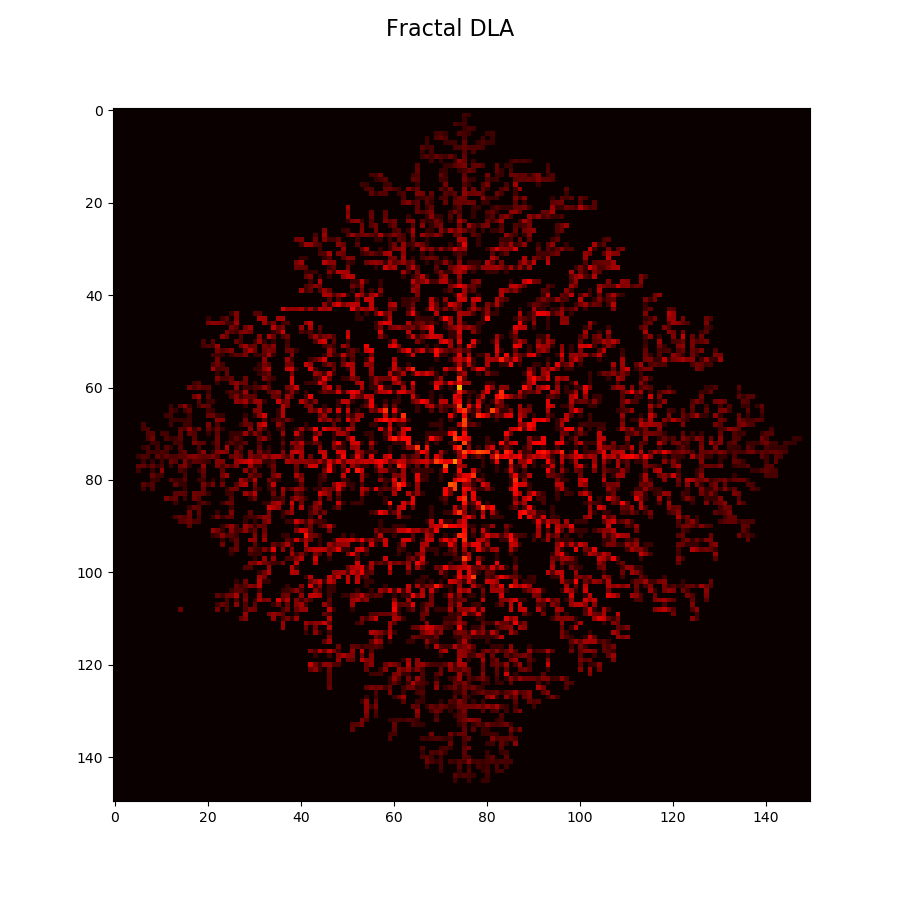

In [11]:
#parameters
size = 150
magnetism = 0.6
start_point = (size//2, size//2)

start_with_liveplot()

## Simulation - showing the result (fast)

In [12]:
def start_with_endplot(steps):
    init_vars()
    
    for i in range(steps):
        update()
    
    # plot
    fig = plt.figure(figsize=(9,9))
    fig.suptitle('Fractal DLA', fontsize=16)
    im = plt.imshow(matrix, interpolation='none', aspect='auto', cmap="hot", vmax=600)
    #fig.colorbar(im)
    plt.show()

<IPython.core.display.Javascript object>


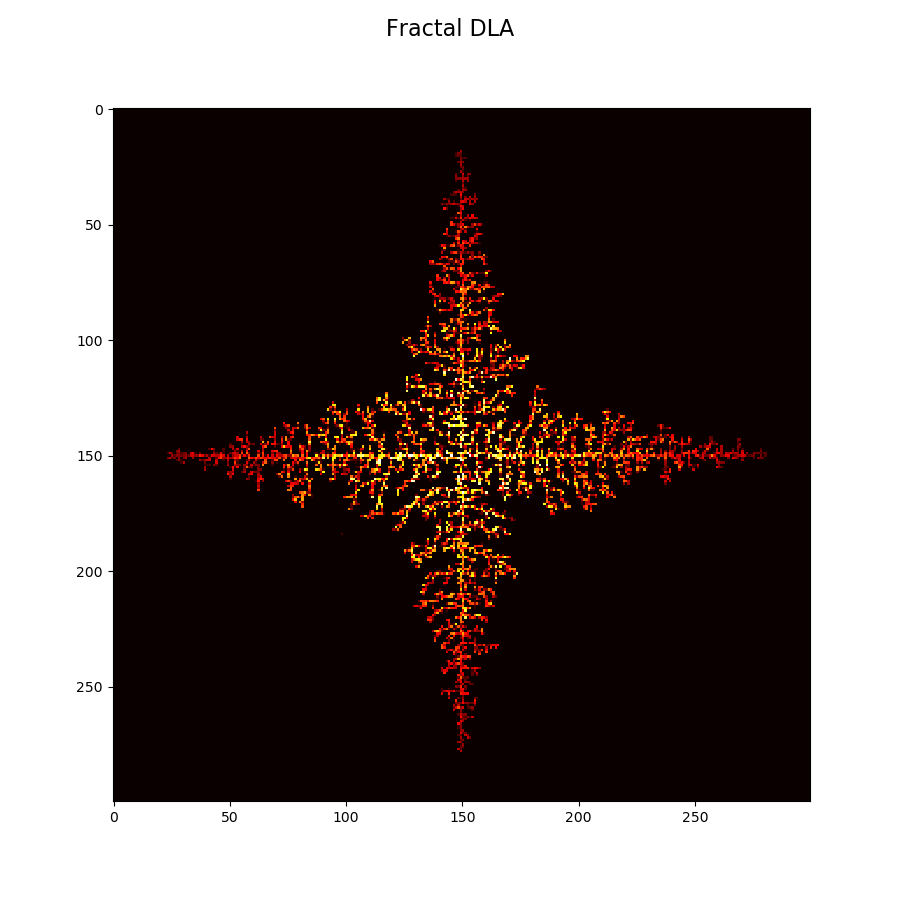

In [13]:
#parameters
size = 300
magnetism = 0.5
start_point = (size//2, size//2)

start_with_endplot(1000000)

<IPython.core.display.Javascript object>


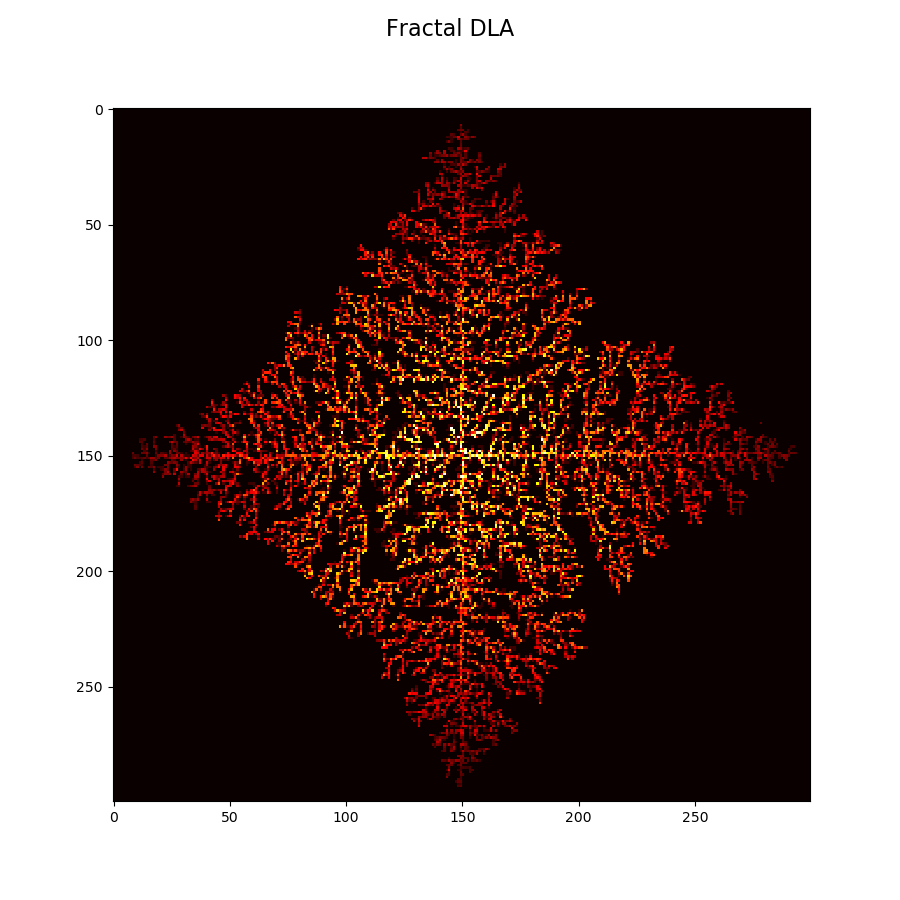

In [14]:
#parameters
size = 300
magnetism = 0.5
start_point = (size//2, size//2)

start_with_endplot(2000000)

<IPython.core.display.Javascript object>


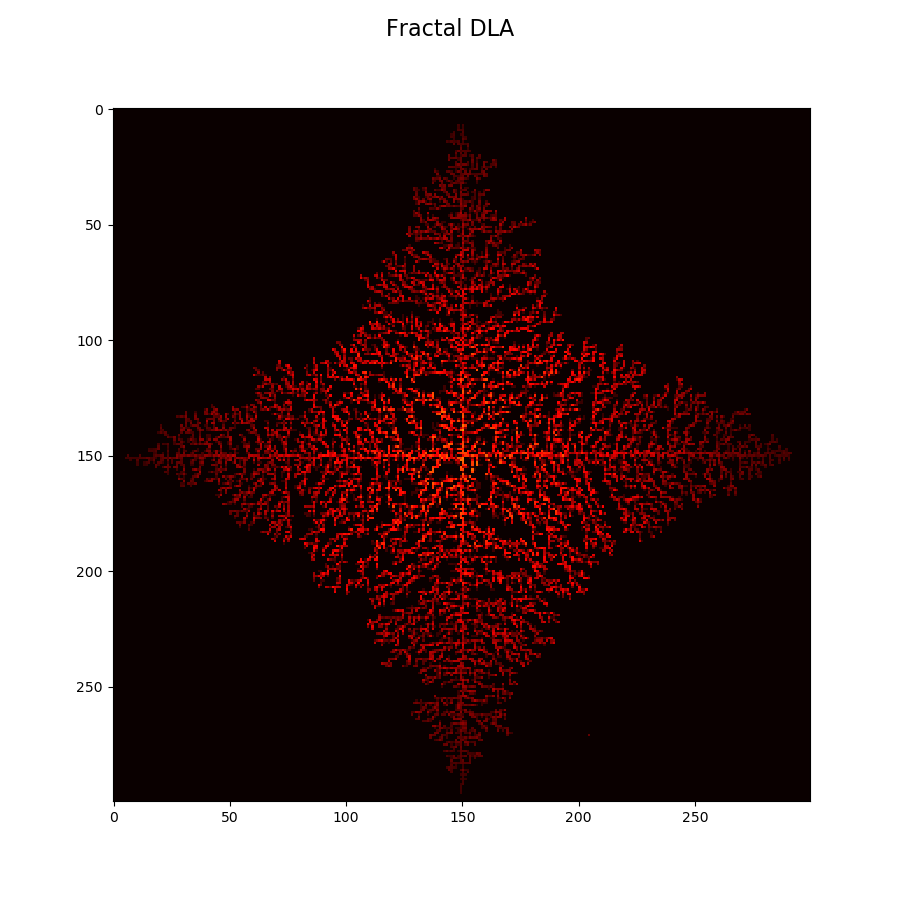

In [15]:
#parameters
size = 300
magnetism = 1
start_point = (size//2, size//2)

start_with_endplot(1000000)

<IPython.core.display.Javascript object>


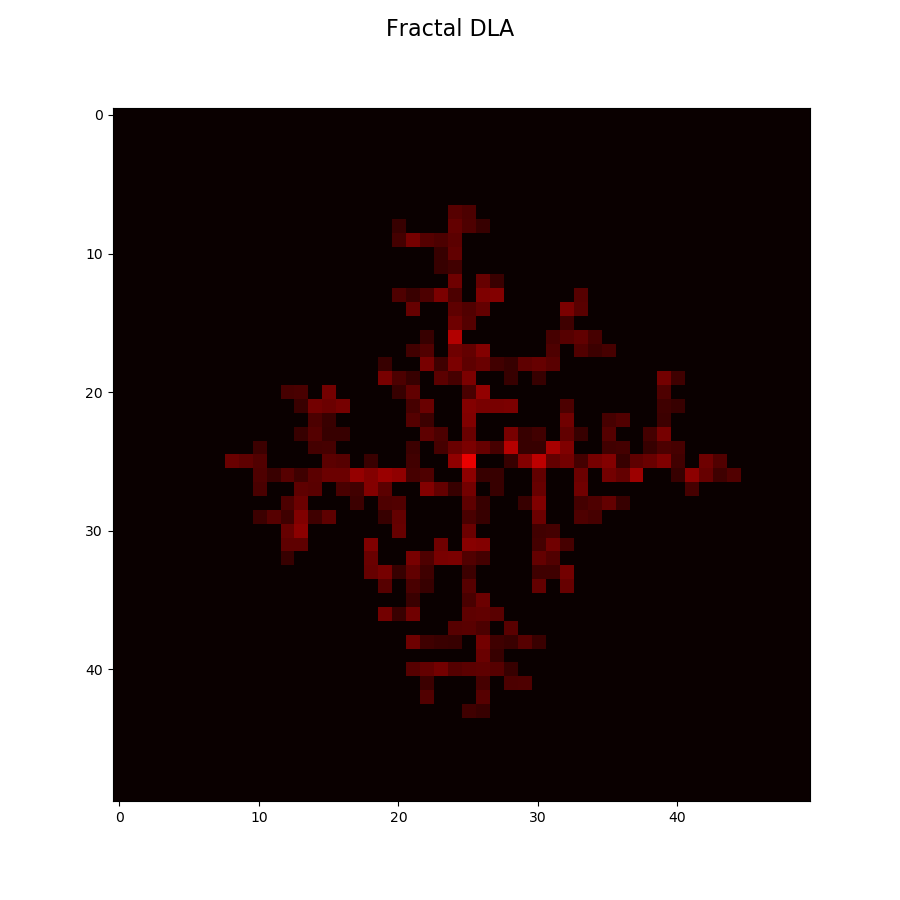

In [16]:
#parameters
size = 50
magnetism = 0.5
start_point = (size//2, size//2)

start_with_endplot(10000)

<IPython.core.display.Javascript object>


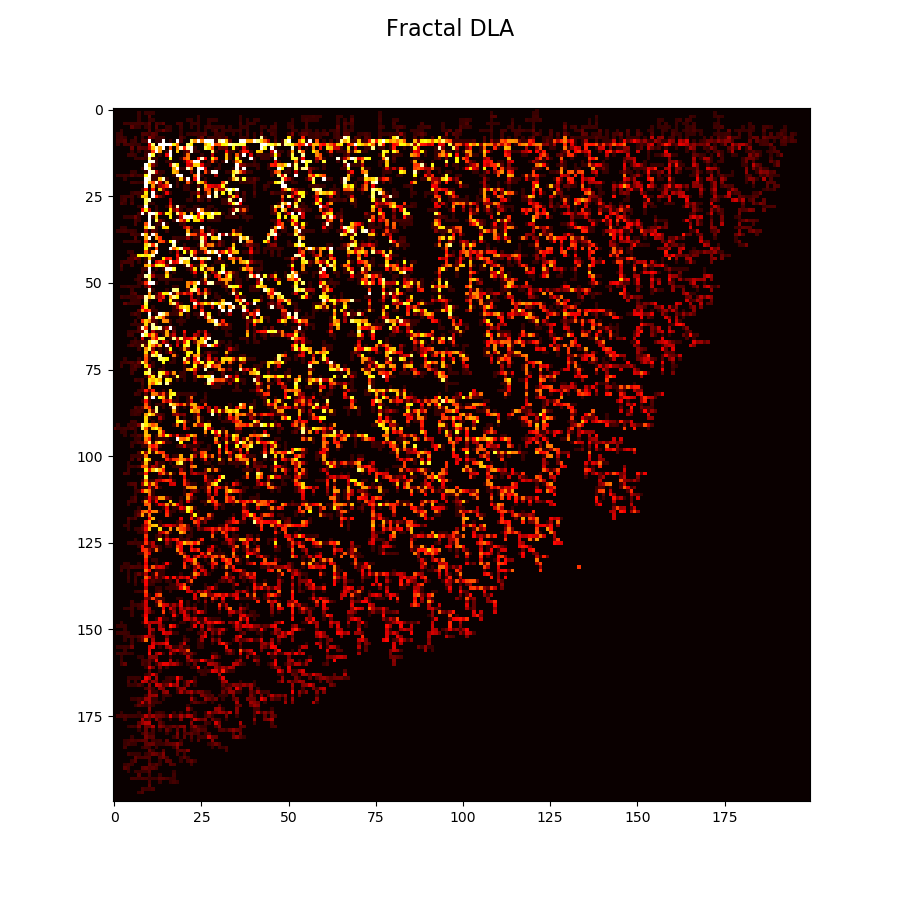

In [17]:
#parameters
size = 200
magnetism = 0.5
start_point = (10,10)

start_with_endplot(1500000)

<IPython.core.display.Javascript object>


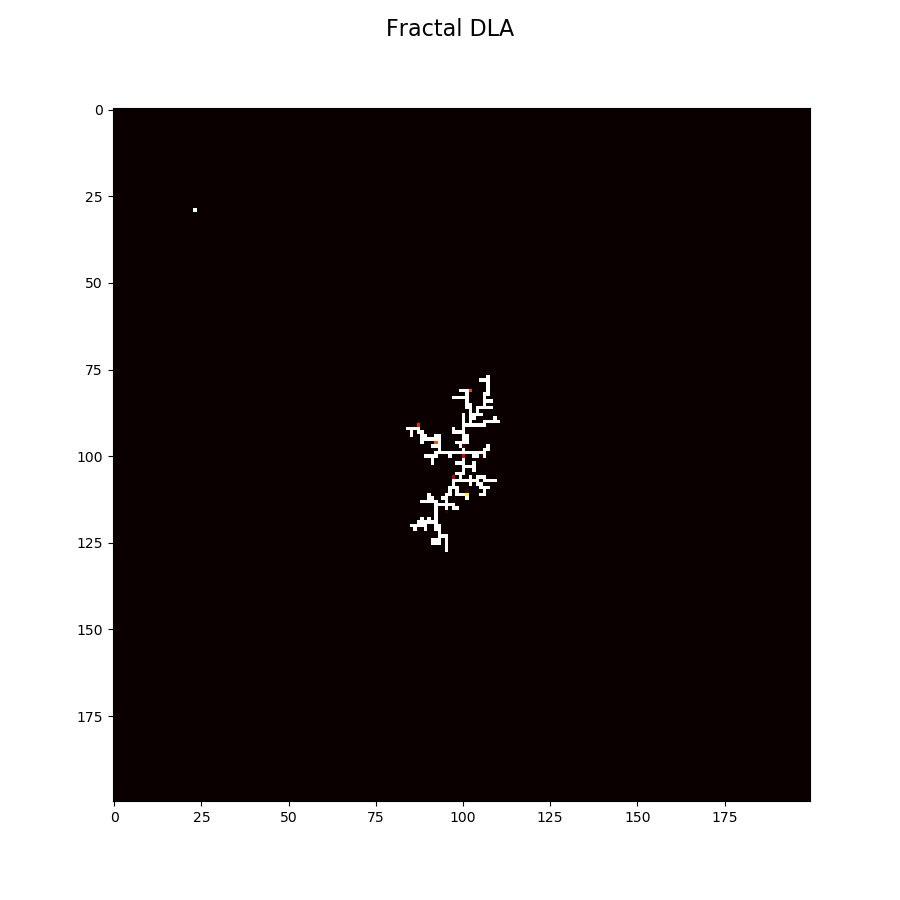

In [18]:
#parameters
size = 200
magnetism = 0
start_point = (size//2 ,size//2)

start_with_endplot(10000000)

<IPython.core.display.Javascript object>


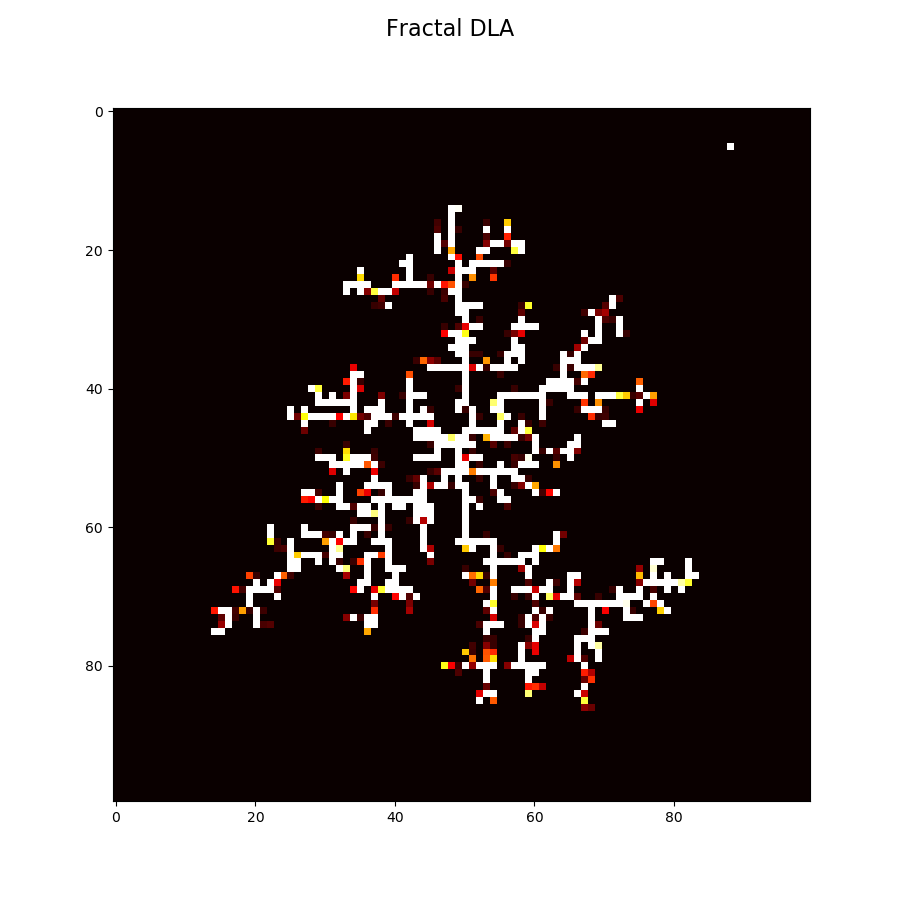

In [19]:
#parameters
size = 100
magnetism = 0
start_point = (size//2 ,size//2)

start_with_endplot(3000000)